# Unemployment Rate in India

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading and understanding the data

In [2]:
df = pd.read_csv("Unemployment in India.csv")


In [3]:
df.shape

(768, 7)

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
497,Himachal Pradesh,31-07-2019,Monthly,21.51,235894.0,49.22,Urban
722,Uttar Pradesh,31-03-2020,Monthly,12.32,13889632.0,40.00,Urban
386,Andhra Pradesh,30-06-2020,Monthly,5.86,4954389.0,37.61,Urban
649,Rajasthan,31-10-2019,Monthly,13.02,5384335.0,40.80,Urban
339,Uttarakhand,31-12-2019,Monthly,4.52,1947566.0,35.19,Rural


In [6]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
df =df.rename(columns={' Date' : 'Date',
                   ' Frequency':'Frequency',
                   ' Estimated Unemployment Rate (%)':'Est Unemp rate',
                   ' Estimated Employed':'Est emp',
                    ' Estimated Labour Participation Rate (%)':'Est labour'}).reset_index(drop=True)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          740 non-null    object 
 1   Date            740 non-null    object 
 2   Frequency       740 non-null    object 
 3   Est Unemp rate  740 non-null    float64
 4   Est emp         740 non-null    float64
 5   Est labour      740 non-null    float64
 6   Area            740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
df['Est emp'] = round(df['Est emp']/100000,2)

In [10]:
df.describe()

,Est Unemp rate,Est emp,Est labour
count,740.000000,740.000000,740.000000
mean,11.787946,72.044459,42.630122
std,10.721298,80.880099,8.111094
min,0.000000,0.490000,13.330000
25%,4.657500,11.907500,38.062500
50%,8.350000,47.440000,41.160000
75%,15.887500,112.755000,45.505000
max,76.740000,457.780000,72.570000


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ARMS\AppData\Local\Temp\ipykernel_10864\2394721818.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          740 non-null    object        
 1   Date            740 non-null    datetime64[ns]
 2   Frequency       740 non-null    object        
 3   Est Unemp rate  740 non-null    float64       
 4   Est emp         740 non-null    float64       
 5   Est labour      740 non-null    float64       
 6   Area            740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [13]:
df.nunique()

Region             28
Date               14
Frequency           2
Est Unemp rate    624
Est emp           700
Est labour        626
Area                2
dtype: int64

### Data Cleaning

In [14]:
df.isna().sum()

Region            28
Date              28
Frequency         28
Est Unemp rate    28
Est emp           28
Est labour        28
Area              28
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          740 non-null    object        
 1   Date            740 non-null    datetime64[ns]
 2   Frequency       740 non-null    object        
 3   Est Unemp rate  740 non-null    float64       
 4   Est emp         740 non-null    float64       
 5   Est labour      740 non-null    float64       
 6   Area            740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [17]:
df.duplicated().sum()

0

In [18]:
df.Frequency.value_counts()

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [19]:
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [20]:
df.drop(columns='Frequency',inplace=True)

## Exploratory Data Analysis

In [21]:
df['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

C:\Users\ARMS\AppData\Local\Temp\ipykernel_10864\226006713.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,x=df['Area'],palette=['silver','black'])


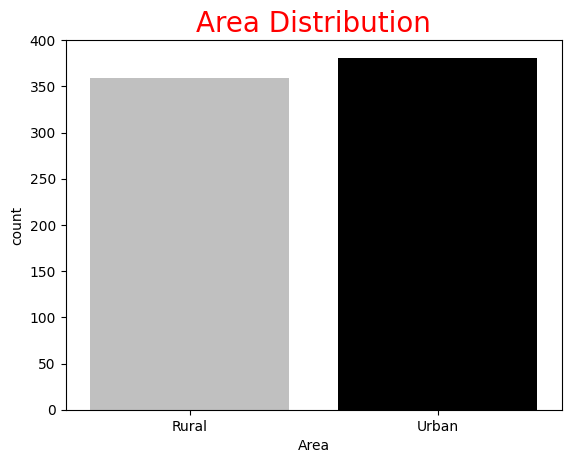

In [22]:
ax = sns.countplot(data=df,x=df['Area'],palette=['silver','black'])

plt.title('Area Distribution',fontdict={"color":"red","fontsize":20})
plt.show()
for x in ax.containers:
    ax.bar_label(x)

##### Both rural and urban areas have almost 50% unemployment rate. Urban areas unemployment rate is slightly large.

In [23]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

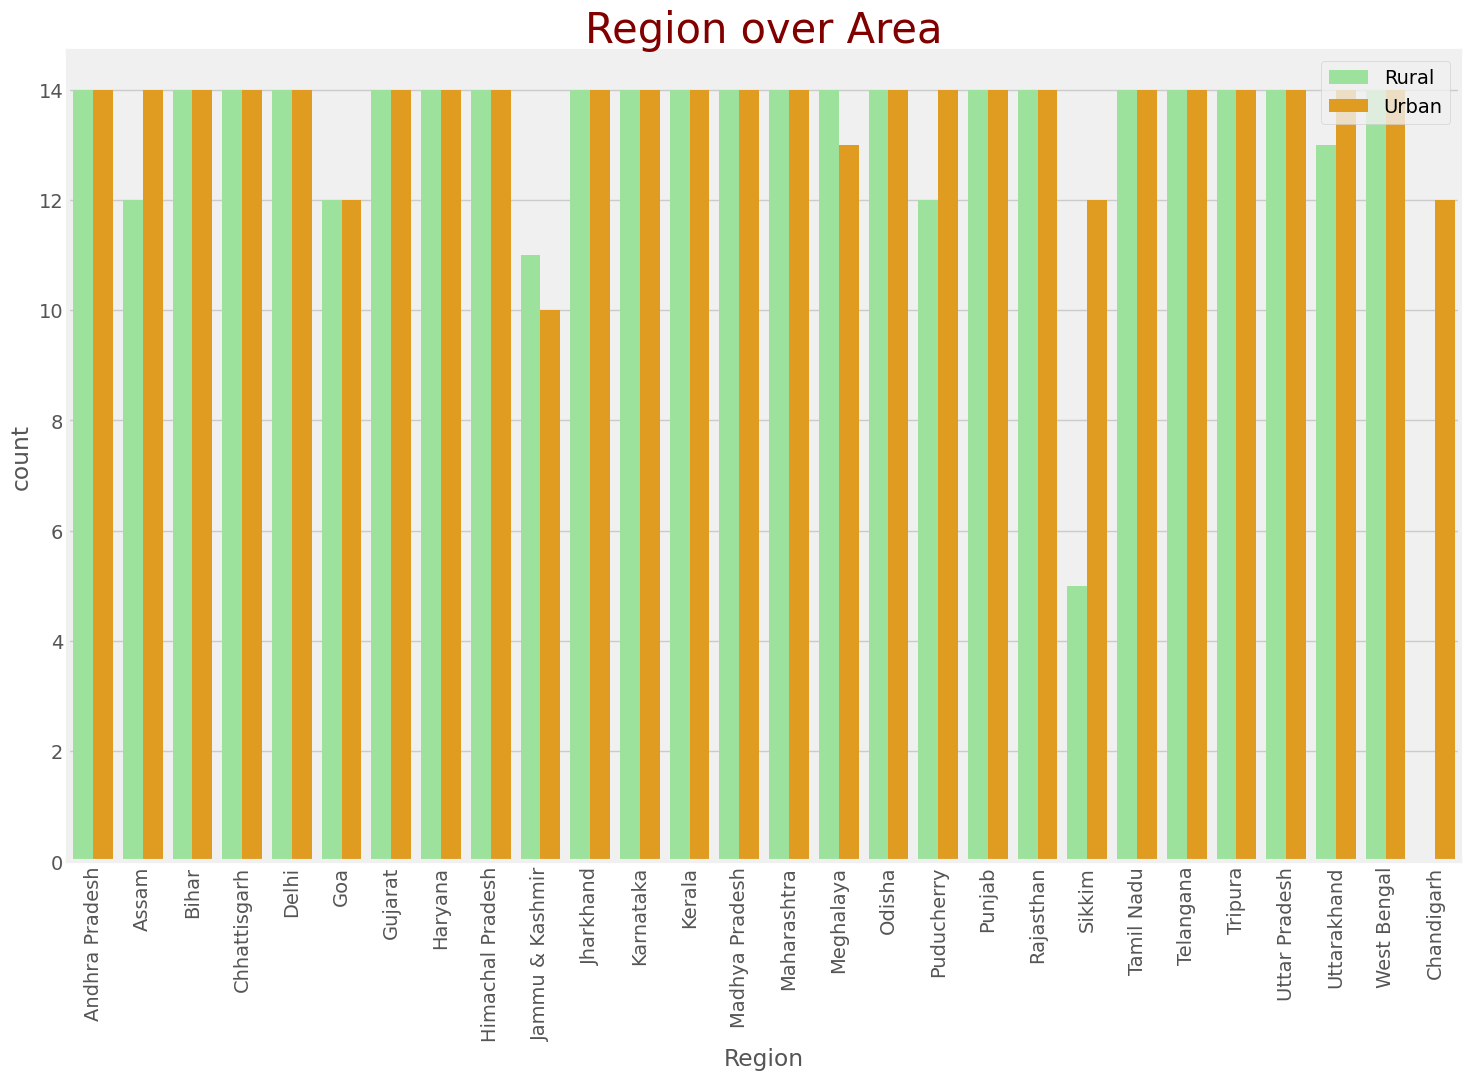

In [31]:
plt.figure(figsize=(16,10))
plt.style.use('fivethirtyeight')
sns.countplot(x=df['Region'],data=df,palette=['lightgreen','orange'],hue=df['Area'])
plt.title('Region over Area',fontdict={'fontsize':30,"color":"maroon"})
plt.xticks(rotation = 90)
plt.legend(loc="best")
plt.show()


##### Skikim has the lowest unemployment rate in rural areas

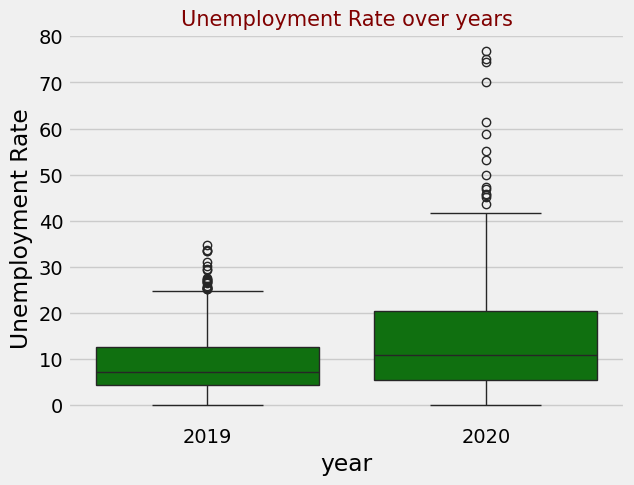

In [25]:
sns.boxplot(y=df['Est Unemp rate'],x=df['year'],color='green')
plt.style.use('ggplot')
plt.title('Unemployment Rate over years',fontdict={'fontsize':15,"color":"maroon"})
plt.ylabel('Unemployment Rate')
plt.show()

##### There are no outliers. Moreover, 2020 has higher unemployment rate as compared to 2019 due to Covid-19. 

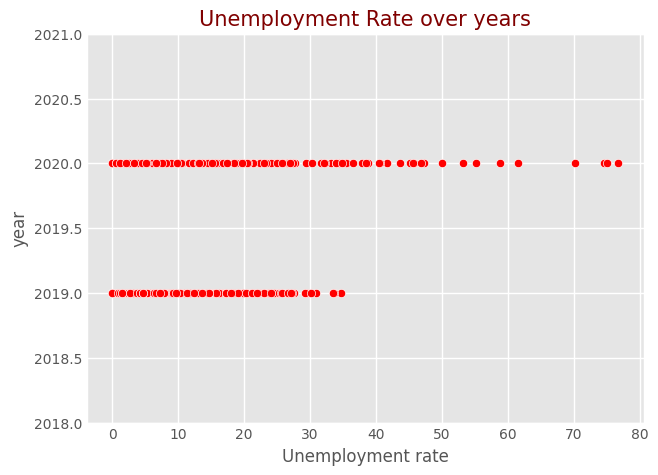

In [26]:
sns.scatterplot(x=df['Est Unemp rate'],y=df['year'],color='red')
plt.style.use('ggplot')
plt.title('Unemployment Rate over years',fontdict={'fontsize':15,"color":"maroon"})
plt.xlabel('Unemployment rate')
plt.ylim(2018,2021)
plt.show()

##### It is clear that 2020 has increase in Unemployment due to Covid-19

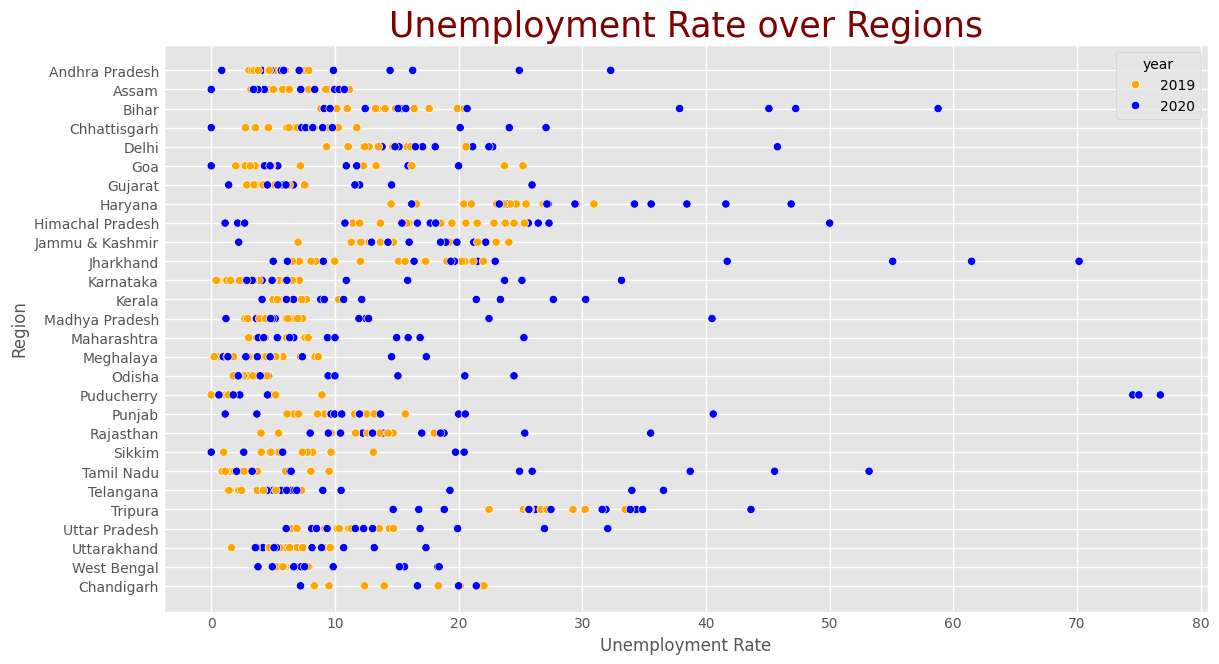

In [27]:
plt.figure(figsize=(12,7))
plt.style.use('ggplot')
sns.scatterplot(y=df['Region'],x=df['Est Unemp rate'],hue=df['year'],palette=['orange','blue'])
plt.xlabel('Unemployment Rate')
plt.title('Unemployment Rate over Regions',fontdict={'fontsize':25,"color":"maroon"})
plt.show()


##### Tamil Nadu, Jharkhand, Haryana and Bihar have high unemployment rate in 2020

In [28]:
df.columns

Index(['Region', 'Date', 'Est Unemp rate', 'Est emp', 'Est labour', 'Area',
       'month', 'year'],
      dtype='object')

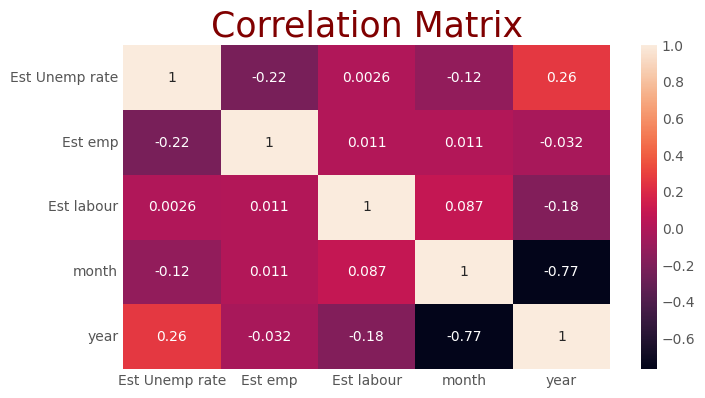

In [29]:

plt.figure(figsize=(7,4))
df_corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(data=df_corr,annot=True)
plt.title('Correlation Matrix',fontdict={'fontsize':25,"color":"maroon"})
plt.show()

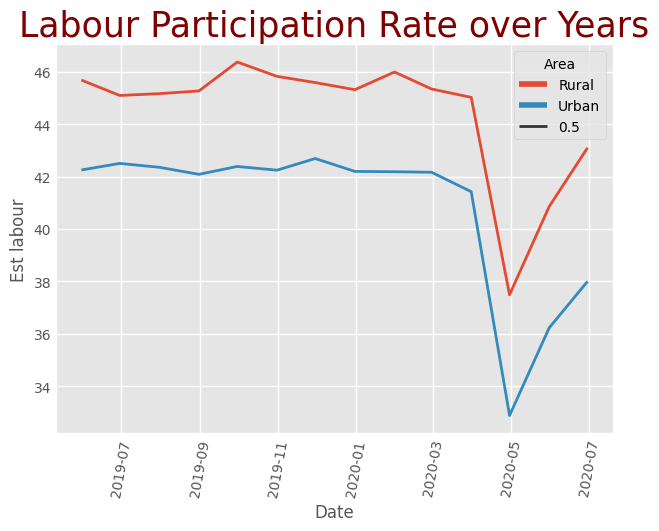

In [30]:
plt.style.use('ggplot')
sns.lineplot(data=df,x=df['Date'],y=df['Est labour'],hue=df['Area'],errorbar=None,size=0.5)
plt.title('Labour Participation Rate over Years',fontdict={'fontsize':25,"color":"maroon"})
plt.xticks(rotation=80)
plt.show()

##### As you see the labour participation rate decreases in 2020, showing that unemployment inceases in 202 due to Covid-19.